In [1]:
import torch
import torchvision
import h5py
import numpy as np
import keras
import tensorflow as tf
from main import EfficientNetB0
import efficientnet.tfkeras as efn
from keras import layers
from torch import nn
from torchvision import transforms
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt


In [83]:
import tensorflow.python.ops.numpy_ops.np_config as np_config
np_config.enable_numpy_behavior()

In [84]:
deep_prof_model = tf.keras.models.load_model('model', compile=False)

In [85]:
for i,l in enumerate(deep_prof_model.layers):
    if l.get_weights():
        print(i, l.get_config()['name'], l.get_weights()[0].shape)
        print(len(l.get_weights()))
        try:
            print(l.get_weights()[1].shape)
        except:
            continue

1 stem_conv (3, 3, 5, 32)
1
2 stem_bn (32,)
4
(32,)
4 block1a_dwconv (3, 3, 32, 1)
1
5 block1a_bn (32,)
4
(32,)
9 block1a_se_reduce (1, 1, 32, 8)
2
(8,)
10 block1a_se_expand (1, 1, 8, 32)
2
(32,)
12 block1a_project_conv (1, 1, 32, 16)
1
13 block1a_project_bn (16,)
4
(16,)
14 block2a_expand_conv (1, 1, 16, 96)
1
15 block2a_expand_bn (96,)
4
(96,)
17 block2a_dwconv (3, 3, 96, 1)
1
18 block2a_bn (96,)
4
(96,)
22 block2a_se_reduce (1, 1, 96, 4)
2
(4,)
23 block2a_se_expand (1, 1, 4, 96)
2
(96,)
25 block2a_project_conv (1, 1, 96, 24)
1
26 block2a_project_bn (24,)
4
(24,)
27 block2b_expand_conv (1, 1, 24, 144)
1
28 block2b_expand_bn (144,)
4
(144,)
30 block2b_dwconv (3, 3, 144, 1)
1
31 block2b_bn (144,)
4
(144,)
35 block2b_se_reduce (1, 1, 144, 6)
2
(6,)
36 block2b_se_expand (1, 1, 6, 144)
2
(144,)
38 block2b_project_conv (1, 1, 144, 24)
1
39 block2b_project_bn (24,)
4
(24,)
42 block3a_expand_conv (1, 1, 24, 144)
1
43 block3a_expand_bn (144,)
4
(144,)
45 block3a_dwconv (5, 5, 144, 1)
1
46 blo

In [107]:
model = efn.EfficientNetB0(weights='imagenet',input_shape=(1024,1024,3), include_top=False)

16809984/16804768 [==============================] - 1s 0us/step


In [130]:
model224 = efn.EfficientNetB0(weights='imagenet',include_top=False)

In [131]:
for i,l in enumerate(model.layers):
    if l.get_weights():
        print(i, l.get_config()['name'], l.get_weights()[0].shape)
        try:
            print(l.get_weights()[1].shape)
        except:
            continue

1 stem_conv (3, 3, 3, 32)
2 stem_bn (32,)
(32,)
4 block1a_dwconv (3, 3, 32, 1)
5 block1a_bn (32,)
(32,)
9 block1a_se_reduce (1, 1, 32, 8)
(8,)
10 block1a_se_expand (1, 1, 8, 32)
(32,)
12 block1a_project_conv (1, 1, 32, 16)
13 block1a_project_bn (16,)
(16,)
14 block2a_expand_conv (1, 1, 16, 96)
15 block2a_expand_bn (96,)
(96,)
17 block2a_dwconv (3, 3, 96, 1)
18 block2a_bn (96,)
(96,)
22 block2a_se_reduce (1, 1, 96, 4)
(4,)
23 block2a_se_expand (1, 1, 4, 96)
(96,)
25 block2a_project_conv (1, 1, 96, 24)
26 block2a_project_bn (24,)
(24,)
27 block2b_expand_conv (1, 1, 24, 144)
28 block2b_expand_bn (144,)
(144,)
30 block2b_dwconv (3, 3, 144, 1)
31 block2b_bn (144,)
(144,)
35 block2b_se_reduce (1, 1, 144, 6)
(6,)
36 block2b_se_expand (1, 1, 6, 144)
(144,)
38 block2b_project_conv (1, 1, 144, 24)
39 block2b_project_bn (24,)
(24,)
42 block3a_expand_conv (1, 1, 24, 144)
43 block3a_expand_bn (144,)
(144,)
45 block3a_dwconv (5, 5, 144, 1)
46 block3a_bn (144,)
(144,)
50 block3a_se_reduce (1, 1, 144,

In [132]:
effnet = EfficientNetB0(input_shape=[1, 3, 1024, 1024], num_channels=3)
effnet224 = EfficientNetB0(input_shape=[1, 3, 224, 224],num_channels=3)

(0, 1, 0, 1) correct_padding
(0, 1, 0, 1) correct_padding


In [133]:
for k,v in effnet.state_dict().items():
    print(k,v.shape)

conv1.weight torch.Size([32, 3, 3, 3])
batch_norm1.weight torch.Size([32])
batch_norm1.bias torch.Size([32])
batch_norm1.running_mean torch.Size([32])
batch_norm1.running_var torch.Size([32])
batch_norm1.num_batches_tracked torch.Size([])
block_list.0.depth_conv.weight torch.Size([32, 1, 3, 3])
block_list.0.batch_norm_depth.weight torch.Size([32])
block_list.0.batch_norm_depth.bias torch.Size([32])
block_list.0.batch_norm_depth.running_mean torch.Size([32])
block_list.0.batch_norm_depth.running_var torch.Size([32])
block_list.0.batch_norm_depth.num_batches_tracked torch.Size([])
block_list.0.conv_se_reduce.weight torch.Size([8, 32, 1, 1])
block_list.0.conv_se_reduce.bias torch.Size([8])
block_list.0.conv_se_expand.weight torch.Size([32, 8, 1, 1])
block_list.0.conv_se_expand.bias torch.Size([32])
block_list.0.conv_output.weight torch.Size([16, 32, 1, 1])
block_list.0.batch_norm_last.weight torch.Size([16])
block_list.0.batch_norm_last.bias torch.Size([16])
block_list.0.batch_norm_last.r

In [139]:
# initialize the state dictionary from the pytorch model to be editted
sd = effnet.state_dict()
sd224 = effnet224.state_dict()

In [140]:
keras_pytorch_convert = {'se_reduce':'conv_se_reduce','se_expand':'conv_se_expand','project_conv':'conv_output',
                       'expand_conv':'conv_expand', 'dwconv':'depth_conv','top_conv':'conv_final','probs':'linear',
                      'stem_conv':'conv1', 'stem_bn':'batch_norm1', 'top_bn':'batch_norm_final','expand_bn':'batch_norm_exp',
                        'bn':'batch_norm_depth','project_bn':'batch_norm_last'}

In [141]:
# doesnt work on depth conv
# transpose works on everything else

In [142]:
layer = -1
name = ''
for i,l in enumerate(model.layers):
    if l.get_weights():
        org_name = l.get_config()['name']
        weights = l.get_weights()
        # any weights in a block unit
        if org_name[0:5] == 'block':
            if org_name[5:7] != name:
                layer += 1
                name=org_name[5:7]
            base_pyt = 'block_list.'
            print('======'*7)
            print('keras')
            print('pytorch')
            print(org_name)
            if keras_pytorch_convert.get(org_name[8:]):
                use = keras_pytorch_convert[org_name[8:]]
                py_name = f'{base_pyt}{layer}.{use}'
                if org_name[8:] == 'dwconv':
                    new_weights = torch.from_numpy(weights[0]).permute(2,3,0,1)
                    sd[py_name+'.weight'] = new_weights
                # any non batchnorm or non depthconv layer
                elif 'bn' not in org_name:
                    new_weights = weights[0]
                    if 'conv' in org_name:
                        new_weights = torch.from_numpy(np.moveaxis(new_weights, [-1, -2], [0, 1]))
                    else:
                        new_weights = torch.from_numpy(new_weights.T)
                    sd[py_name+'.weight'] = new_weights
                    # this means theres a bias to account for
                    if len(weights)>1:
                        new_weights = weights[1]
                        new_weights = torch.from_numpy(new_weights)
                        sd[py_name+'.bias'] = new_weights
                # its a batchnorm layer
                else:
                    new_weights = weights[0]
                    new_weights = torch.from_numpy(new_weights)
                    sd[py_name+'.weight'] = new_weights
                    # this means theres a bias to account for
                    if len(weights)>1:
                        new_weights = [torch.from_numpy(i) for i in weights]
                        sd[py_name+'.bias'] = new_weights[1]
                        sd[py_name+'.running_mean'] = new_weights[2]
                        sd[py_name+'.running_var'] = new_weights[3]
            else:
                continue
        # initial convs or final convs
        else:
            print('======'*7)
            print(org_name)
            py_name = keras_pytorch_convert[org_name]
            if 'bn' in org_name:
                new_weights = torch.from_numpy(weights[0])
            else:
                new_weights = torch.from_numpy(np.moveaxis(weights[0], [-1, -2], [0, 1]))
            sd[py_name+'.weight'] = new_weights
            # handle bias weights as well
            if len(weights) > 1:
                new_weights = [torch.from_numpy(i) for i in weights]
                sd[py_name+'.bias'] = new_weights[1]
                if org_name == 'probs':
                    continue
                sd[py_name+'.running_mean'] = new_weights[2]
                sd[py_name+'.running_var'] = new_weights[3]

                

stem_conv
stem_bn
keras
pytorch
block1a_dwconv
keras
pytorch
block1a_bn
keras
pytorch
block1a_se_reduce
keras
pytorch
block1a_se_expand
keras
pytorch
block1a_project_conv
keras
pytorch
block1a_project_bn
keras
pytorch
block2a_expand_conv
keras
pytorch
block2a_expand_bn
keras
pytorch
block2a_dwconv
keras
pytorch
block2a_bn
keras
pytorch
block2a_se_reduce
keras
pytorch
block2a_se_expand
keras
pytorch
block2a_project_conv
keras
pytorch
block2a_project_bn
keras
pytorch
block2b_expand_conv
keras
pytorch
block2b_expand_bn
keras
pytorch
block2b_dwconv
keras
pytorch
block2b_bn
keras
pytorch
block2b_se_reduce
keras
pytorch
block2b_se_expand
keras
pytorch
block2b_project_conv
keras
pytorch
block2b_project_bn
keras
pytorch
block3a_expand_conv
keras
pytorch
block3a_expand_bn
keras
pytorch
block3a_dwconv
keras
pytorch
block3a_bn
keras
pytorch
block3a_se_reduce
keras
pytorch
block3a_se_expand
keras
pytorch
block3a_project_conv
keras
pytorch
block3a_project_bn
keras
pytorch
block3b_expand_conv
keras


In [143]:
layer = -1
name = ''
for i,l in enumerate(model224.layers):
    if l.get_weights():
        org_name = l.get_config()['name']
        weights = l.get_weights()
        # any weights in a block unit
        if org_name[0:5] == 'block':
            if org_name[5:7] != name:
                layer += 1
                name=org_name[5:7]
            base_pyt = 'block_list.'
            print('======'*7)
            print('keras')
            print('pytorch')
            print(org_name)
            if keras_pytorch_convert.get(org_name[8:]):
                use = keras_pytorch_convert[org_name[8:]]
                py_name = f'{base_pyt}{layer}.{use}'
                if org_name[8:] == 'dwconv':
                    new_weights = torch.from_numpy(weights[0]).permute(2,3,0,1)
                    sd224[py_name+'.weight'] = new_weights
                # any non batchnorm or non depthconv layer
                elif 'bn' not in org_name:
                    new_weights = weights[0]
                    if 'conv' in org_name:
                        new_weights = torch.from_numpy(np.moveaxis(new_weights, [-1, -2], [0, 1]))
                    else:
                        new_weights = torch.from_numpy(new_weights.T)
                    sd224[py_name+'.weight'] = new_weights
                    # this means theres a bias to account for
                    if len(weights)>1:
                        new_weights = weights[1]
                        new_weights = torch.from_numpy(new_weights)
                        sd224[py_name+'.bias'] = new_weights
                # its a batchnorm layer
                else:
                    new_weights = weights[0]
                    new_weights = torch.from_numpy(new_weights)
                    sd224[py_name+'.weight'] = new_weights
                    # this means theres a bias to account for
                    if len(weights)>1:
                        new_weights = [torch.from_numpy(i) for i in weights]
                        sd224[py_name+'.bias'] = new_weights[1]
                        sd224[py_name+'.running_mean'] = new_weights[2]
                        sd224[py_name+'.running_var'] = new_weights[3]
            else:
                continue
        # initial convs or final convs
        else:
            print('======'*7)
            print(org_name)
            py_name = keras_pytorch_convert[org_name]
            if 'bn' in org_name:
                new_weights = torch.from_numpy(weights[0])
            else:
                new_weights = torch.from_numpy(np.moveaxis(weights[0], [-1, -2], [0, 1]))
            sd224[py_name+'.weight'] = new_weights
            # handle bias weights as well
            if len(weights) > 1:
                new_weights = [torch.from_numpy(i) for i in weights]
                sd224[py_name+'.bias'] = new_weights[1]
                if org_name == 'probs':
                    continue
                sd224[py_name+'.running_mean'] = new_weights[2]
                sd224[py_name+'.running_var'] = new_weights[3]

                

stem_conv
stem_bn
keras
pytorch
block1a_dwconv
keras
pytorch
block1a_bn
keras
pytorch
block1a_se_reduce
keras
pytorch
block1a_se_expand
keras
pytorch
block1a_project_conv
keras
pytorch
block1a_project_bn
keras
pytorch
block2a_expand_conv
keras
pytorch
block2a_expand_bn
keras
pytorch
block2a_dwconv
keras
pytorch
block2a_bn
keras
pytorch
block2a_se_reduce
keras
pytorch
block2a_se_expand
keras
pytorch
block2a_project_conv
keras
pytorch
block2a_project_bn
keras
pytorch
block2b_expand_conv
keras
pytorch
block2b_expand_bn
keras
pytorch
block2b_dwconv
keras
pytorch
block2b_bn
keras
pytorch
block2b_se_reduce
keras
pytorch
block2b_se_expand
keras
pytorch
block2b_project_conv
keras
pytorch
block2b_project_bn
keras
pytorch
block3a_expand_conv
keras
pytorch
block3a_expand_bn
keras
pytorch
block3a_dwconv
keras
pytorch
block3a_bn
keras
pytorch
block3a_se_reduce
keras
pytorch
block3a_se_expand
keras
pytorch
block3a_project_conv
keras
pytorch
block3a_project_bn
keras
pytorch
block3b_expand_conv
keras


In [144]:
effnet.load_state_dict(sd)
effnet224.load_state_dict(sd224)

<All keys matched successfully>

In [153]:
x = np.random.rand(1,1024,1024,3)
# x = np.ones((224,224,3))
x = np.array(x)
x_t = torch.from_numpy(x)
x_t = x_t.permute(0,3,1,2).float()
print(x.shape, x_t.shape)

(1, 1024, 1024, 3) torch.Size([1, 3, 1024, 1024])


In [154]:
extractor = keras.Model(inputs=model.inputs,
                        outputs={layer.get_config()['name']:layer.output for layer in model.layers})
features = extractor.predict(x)

In [155]:
#pyt version
effnet.eval()
y_t = effnet(x_t)

tensor([[[[-4.4418e-02, -3.4994e-02, -3.4779e-02,  ..., -4.3876e-02,
           -2.4141e-02, -4.4918e-02],
          [-4.7526e-02, -3.2949e-02, -2.8745e-02,  ..., -3.6436e-02,
           -3.4363e-02, -3.8012e-02],
          [-4.0864e-02, -2.8381e-02, -4.5805e-02,  ..., -3.3441e-02,
           -5.2645e-02, -2.3048e-02],
          ...,
          [-4.0392e-02, -4.8367e-02, -4.9271e-02,  ..., -4.3930e-02,
           -3.8938e-02, -3.4501e-02],
          [-4.3941e-02, -3.4300e-02, -3.5684e-02,  ..., -3.5393e-02,
           -3.2634e-02, -3.9375e-02],
          [-3.4398e-02, -3.3530e-02, -3.3566e-02,  ..., -3.2334e-02,
           -4.2428e-02, -3.0040e-02]],

         [[ 2.0800e+00, -2.7133e-01,  4.5674e+00,  ..., -6.2230e-02,
            3.1624e+00,  6.1721e+00],
          [ 1.0132e+00, -2.6141e-01,  5.6980e+00,  ...,  3.7692e+00,
            3.5195e+00,  3.3959e+00],
          [ 2.9666e+00,  6.7849e-01,  1.2052e+00,  ...,  2.5062e+00,
            3.4037e+00,  8.6714e-01],
          ...,
     

tensor([[[[-0.1770, -0.0982, -0.0925,  ..., -0.0836, -0.1166, -0.0707],
          [-0.0937, -0.0736, -0.0695,  ..., -0.0744, -0.0645, -0.0474],
          [-0.1076, -0.0913, -0.0711,  ..., -0.0548, -0.0606,  0.0054],
          ...,
          [-0.1241, -0.0886, -0.0699,  ..., -0.0320, -0.0594, -0.0751],
          [-0.0768, -0.0751, -0.0424,  ..., -0.0467, -0.0530,  0.0098],
          [-0.0601,  0.0187, -0.0114,  ..., -0.0172,  0.0035, -0.0429]],

         [[-0.1845, -0.2581, -0.2537,  ..., -0.2783, -0.2750, -0.2450],
          [-0.2270, -0.2013, -0.2402,  ..., -0.2377, -0.2682, -0.2784],
          [-0.2783, -0.2781, -0.2702,  ..., -0.2753, -0.2784, -0.2359],
          ...,
          [-0.2732, -0.2540, -0.2756,  ..., -0.2785, -0.2720, -0.2769],
          [-0.2696, -0.2612, -0.2783,  ..., -0.2531, -0.2517, -0.2771],
          [-0.1690, -0.2261, -0.2439,  ..., -0.2381, -0.0995, -0.2435]],

         [[ 0.6620, -0.2737, -0.2779,  ..., -0.2355, -0.0889, -0.0500],
          [-0.2279, -0.2387, -

In [156]:
x = np.random.rand(1,224,224,3)
# x = np.ones((224,224,3))
x = np.array(x)
x_t = torch.from_numpy(x)
x_t = x_t.permute(0,3,1,2).float()
print(x.shape, x_t.shape)

(1, 224, 224, 3) torch.Size([1, 3, 224, 224])


In [157]:
extractor = keras.Model(inputs=model224.inputs,
                        outputs={layer.get_config()['name']:layer.output for layer in model224.layers})
features224 = extractor.predict(x)
#pyt version
effnet224.eval()
y_t = effnet224(x_t)

tensor([[[[-3.8821e-02, -3.8968e-02, -4.3930e-02,  ..., -2.5328e-02,
           -4.4446e-02, -3.6560e-02],
          [-3.4691e-02, -3.6093e-02, -3.4512e-02,  ..., -4.7571e-02,
           -3.1100e-02, -4.7437e-02],
          [-5.7399e-02, -3.8674e-02, -4.8531e-02,  ..., -2.1544e-02,
           -2.4036e-02, -3.4293e-02],
          ...,
          [-2.6914e-02, -4.2929e-02, -3.8578e-02,  ..., -4.5598e-02,
           -2.6706e-02, -3.4608e-02],
          [-4.4663e-02, -2.6736e-02, -3.3816e-02,  ..., -3.2928e-02,
           -3.5742e-02, -3.1695e-02],
          [-2.9024e-02, -2.6124e-02, -3.7321e-02,  ..., -4.3574e-02,
           -3.6651e-02, -2.9214e-02]],

         [[ 3.2531e-01,  4.5535e+00,  3.1574e+00,  ...,  3.3753e+00,
            1.9668e+00, -1.8638e-01],
          [ 1.5576e+00,  5.1508e+00,  5.5543e+00,  ...,  3.5033e+00,
            5.3664e+00,  8.6888e-01],
          [ 1.5955e+00, -2.7128e-01,  3.2469e+00,  ...,  3.0240e+00,
            1.5146e+00,  1.2946e+00],
          ...,
     

In [158]:
effnet.outputs.keys()

dict_keys(['pre_conv1', 'conv1', 'bn1', 'activation1', 'block_0', 'block_1', 'block_2', 'block_3', 'block_4', 'block_5', 'block_6', 'block_7', 'block_8', 'block_9', 'block_10', 'block_11', 'block_12', 'block_13', 'block_14', 'block_15', 'final_conv_and_swish'])

In [159]:
list(features.keys())[-5:]

['block7a_project_conv',
 'block7a_project_bn',
 'top_conv',
 'top_bn',
 'top_activation']

In [165]:
test_pyt = effnet.outputs['final_conv_and_swish'].permute(0,2,3,1)
test_pyt224 = effnet224.outputs['final_conv_and_swish'].permute(0,2,3,1)
print(test_pyt.shape)
print(test_pyt224.shape)
test_pyt = test_pyt.numpy()
test_pyt224 = test_pyt224.numpy()

torch.Size([1, 32, 32, 1280])
torch.Size([1, 7, 7, 1280])


In [167]:
test_keras = features['top_activation']
test_keras224 = features224['top_activation']
print(test_keras.shape)
print(test_keras224.shape)

(1, 32, 32, 1280)
(1, 7, 7, 1280)


In [168]:
test_pyt_f = test_pyt.flatten()
test_keras_f = test_keras.flatten()
test_pyt_f224 = test_pyt224.flatten()
test_keras_f224 = test_keras224.flatten()
differences = test_keras_f - test_pyt_f
differences224 = test_keras_f224 - test_pyt_f224

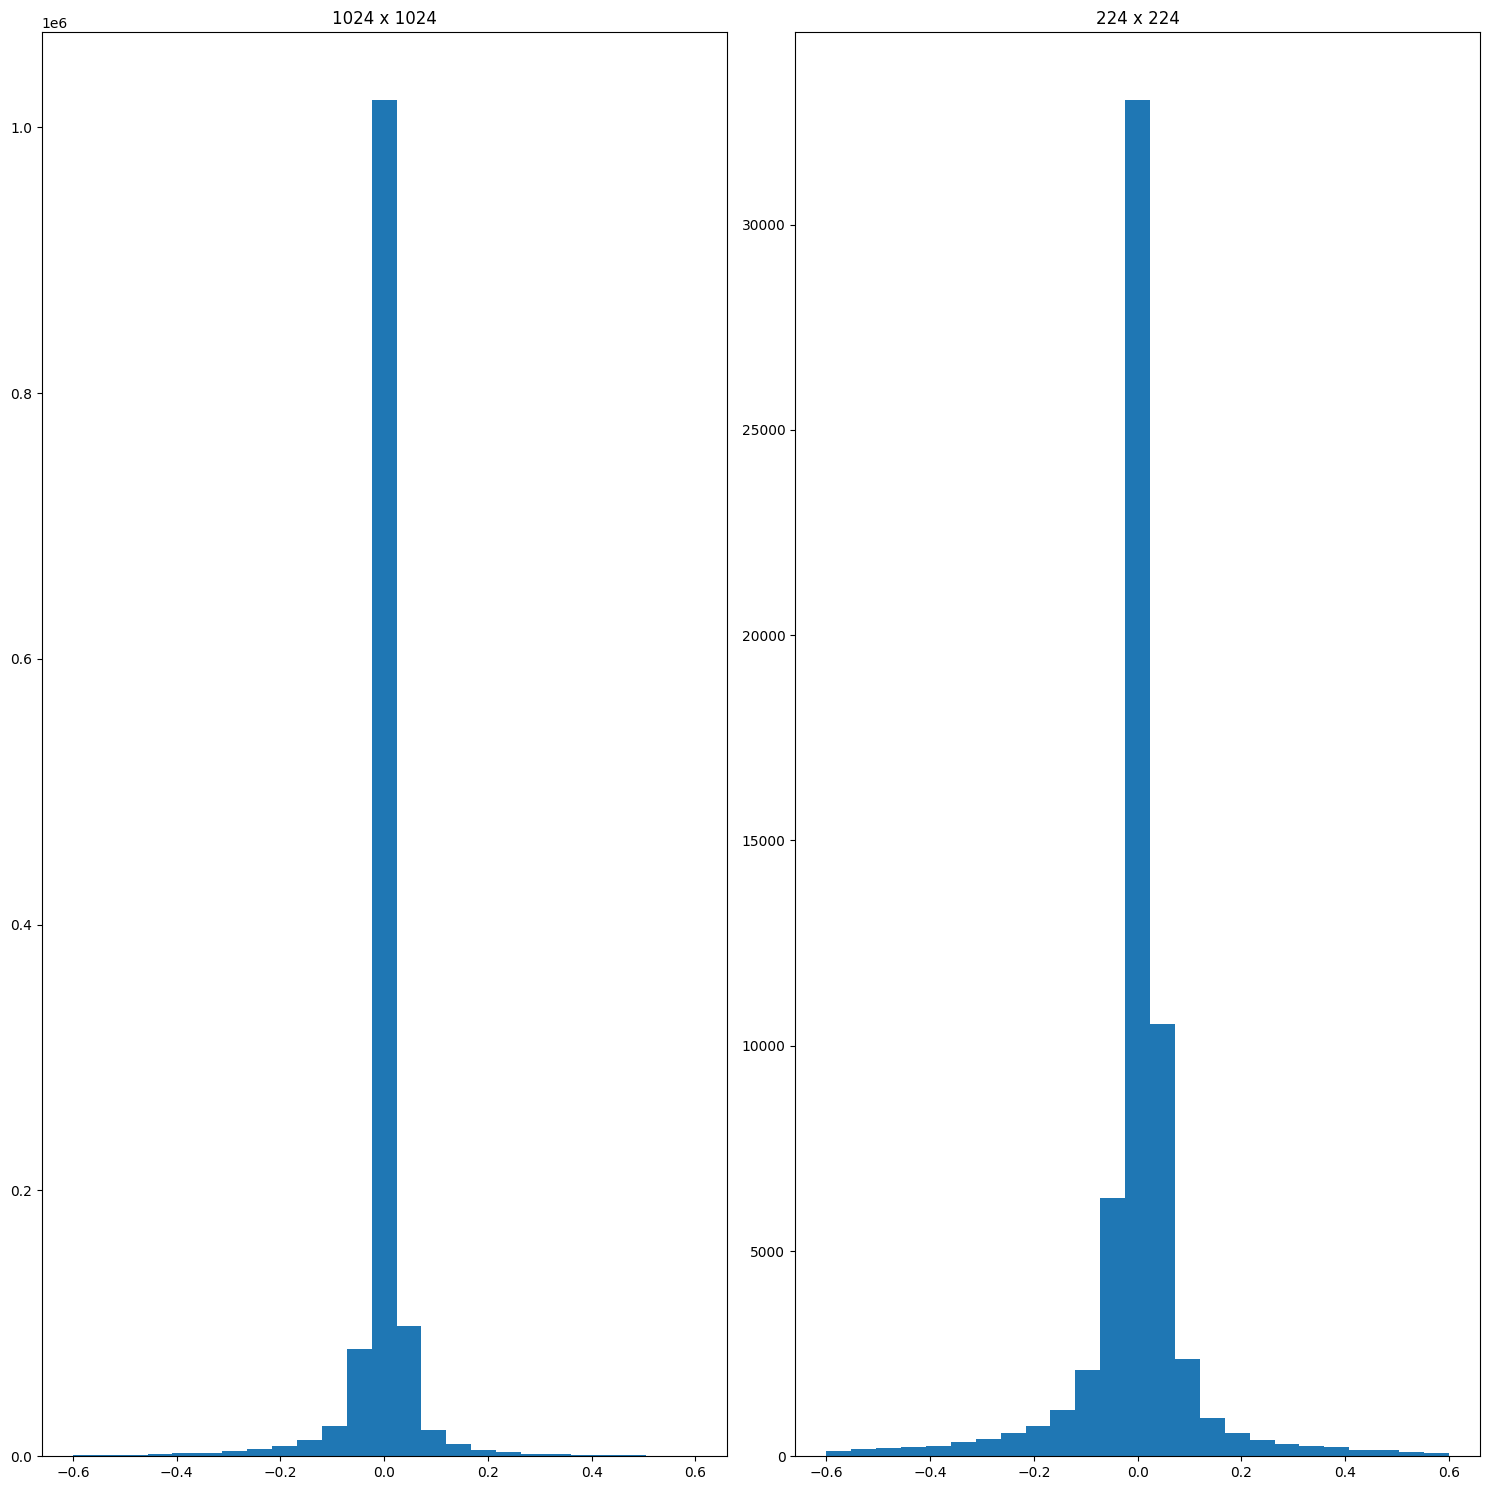

In [180]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0].hist(differences, bins=25, range=(-.6,.6));
axs[0].set_title('1024 x 1024');
axs[1].hist(differences224, bins=25, range=(-.6,.6));
axs[1].set_title('224 x 224');
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

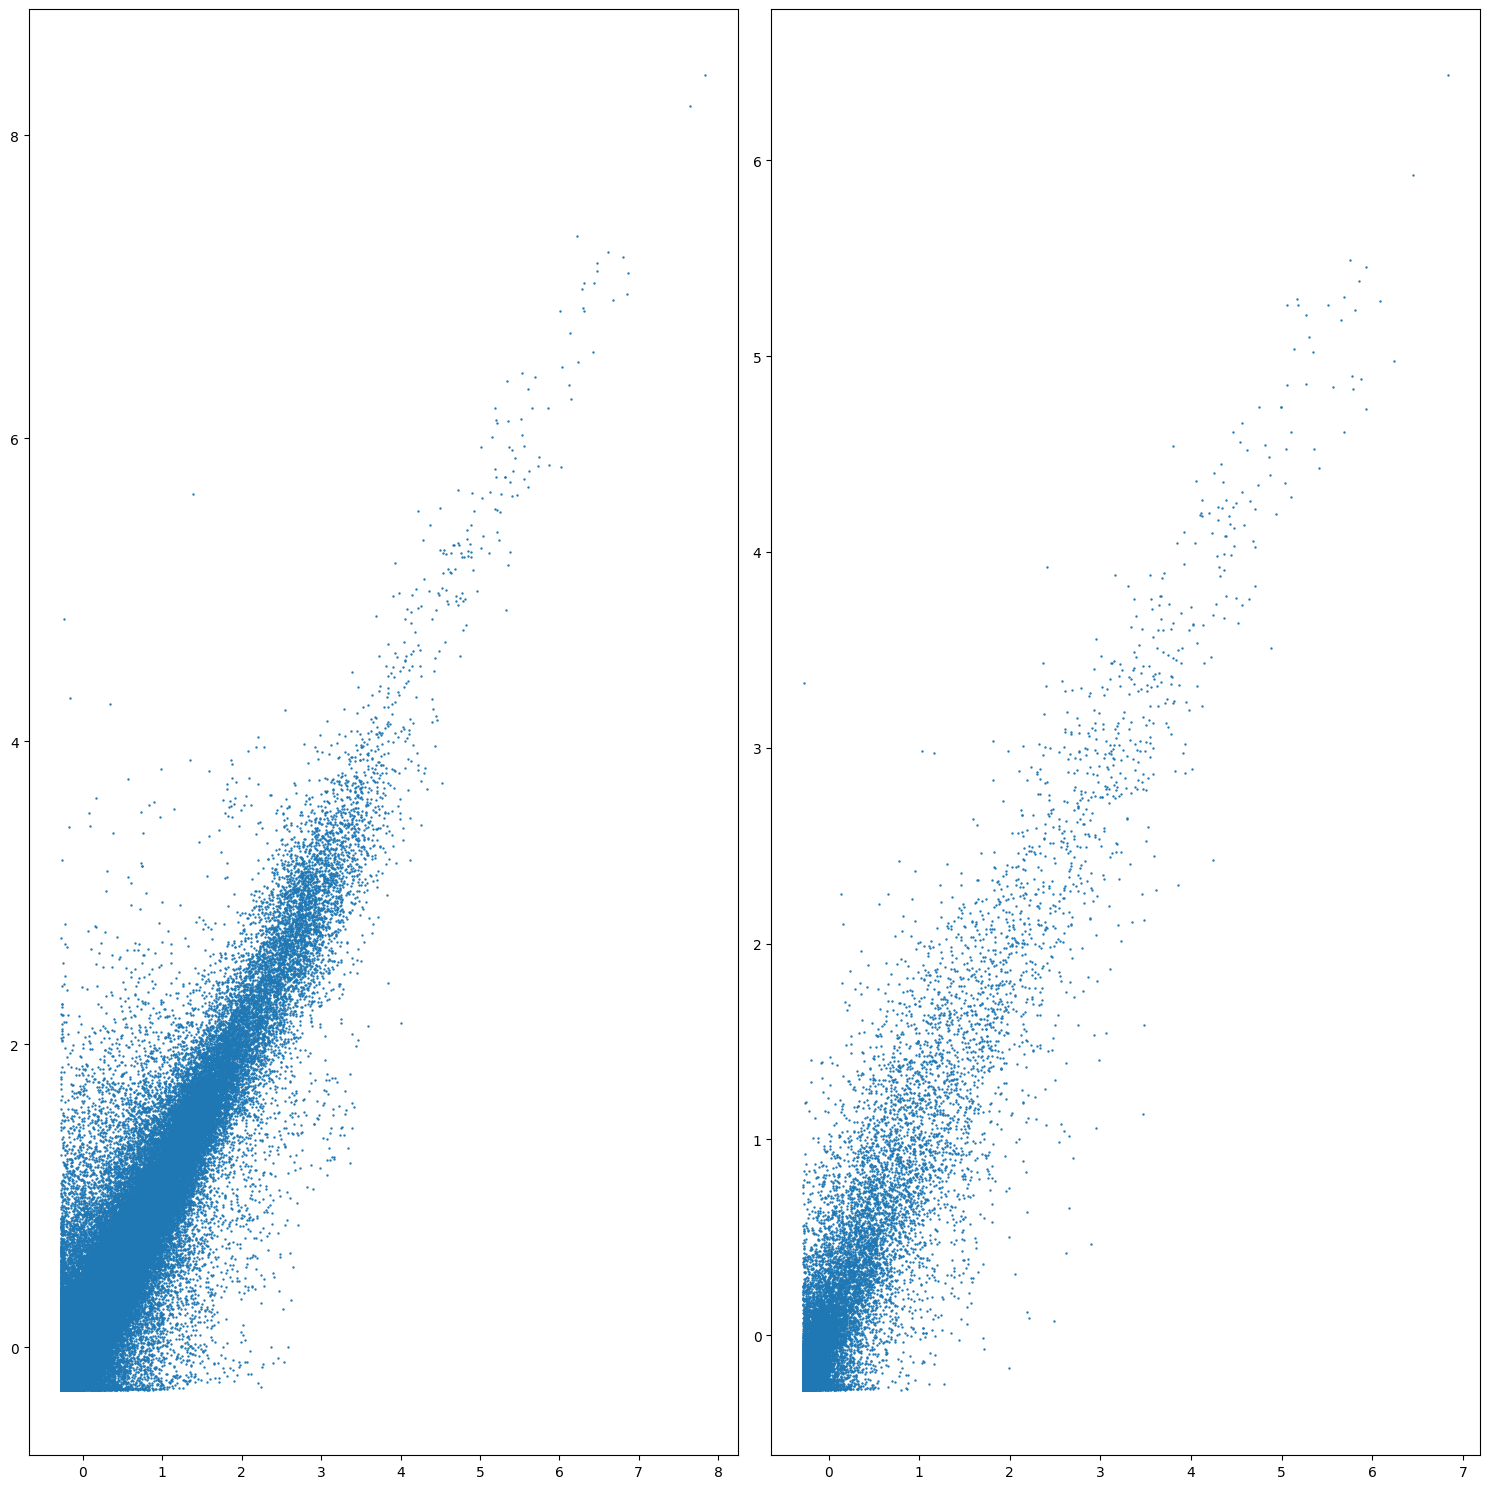

In [184]:
plt.clf()
fig,ax = plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0].title.set_text('1024 x 1024');
axs[1].title.set_text('224 x 224');
ax[0].scatter(test_keras_f, test_pyt_f,s=.5)
ax[0].autoscale()
ax[1].scatter(test_keras_f224, test_pyt_f224,s=.5)
ax[1].autoscale()

plt.tight_layout()
plt.show()

In [23]:
# final layer is a probability layer, size (1000,), so this is to look at the top probabilities
top_15_keras = np.argsort(test_keras)[::-1][0:15]
top_15_pytorch = np.argsort(test_pyt.detach().numpy())[::-1][0:15]
print('top 15 in keras: ', top_15_keras)
print('top 15 in pytorch: ', top_15_pytorch)
top_15_intersection = set(top_15_keras).intersection(set(top_15_pytorch))
print(f'there are {len(top_15_intersection)} common indices in the top 15: ', top_15_intersection)

top 15 in keras:  [885 844 446 892 539 852 549  21  23 911 777 305 812 763  18]
top 15 in pytorch:  [549 539 844 446 885 852 892  21 921 741  23 777 700 600 911]
there are 11 common indices in the top 15:  {549, 777, 844, 911, 852, 885, 21, 23, 539, 892, 446}


In [24]:
def correct_pad(input_shape, kernel_size):
    """Returns a tuple for zero-padding for 2D convolution with downsampling.
    Args:
      input_shape: Input img shape
      kernel_size: An integer or tuple/list of 2 integers.
    Returns:
      A tuple.
    """
    img_dim = 2
    input_size = list(input_shape)[img_dim: (img_dim + 2)]
    # 128, 128
    if type(kernel_size):
        kernel_size = (kernel_size, kernel_size)
    # 3, 3
    if input_size[0] is None:
        adjust = (1, 1)
    else:
        adjust = (1 - input_size[0] % 2, 1 - input_size[1] % 2)
    correct = (kernel_size[0] // 2, kernel_size[1] // 2)
    return (
        correct[1] - adjust[1], correct[1],
        correct[0] - adjust[0], correct[0],
    )

In [25]:
# (top, bottom) (left, right)
imagenet_utils.correct_pad(x,3), correct_pad([1, 3, 224, 224],3)

(((0, 1), (0, 1)), (0, 1, 0, 1))

In [26]:
x = np.random.rand(224,224,3)
# x = np.ones((224,224,3))
x = np.array([x])
x_t = torch.from_numpy(x)
x_t = x_t.permute(0,3,1,2).float()
print(x.shape, x_t.shape)

(1, 224, 224, 3) torch.Size([1, 3, 224, 224])


In [27]:
x1 = layers.Rescaling(1.0 / 255.0)(x)
x1 = layers.Normalization(axis=1)(x1)
a,b,c,d = correct_pad(x1.shape, 3)
# (top, bottom) (left, right) for padding argument
x1 = layers.ZeroPadding2D(
        padding=imagenet_utils.correct_pad(x,3), data_format='channels_last',name="stem_conv_pad")(x1)

In [28]:
rescale = lambda x: x * 1./255
pyt_transforms = transforms.Compose([
            transforms.Lambda(rescale),
            transforms.Normalize(0, 1),
            # padding left, right, top, bottom
            transforms.Lambda(nn.ZeroPad2d(padding=correct_pad([1, 3, 224, 224],3))),]
        )

In [29]:
x_t1 = pyt_transforms(x_t)

In [30]:
x1.shape, x_t1.shape

(TensorShape([1, 225, 225, 3]), torch.Size([1, 3, 225, 225]))

In [31]:
x1[0][0:3,0:3,0], x_t1[0].permute(1,2,0)[0:3,0:3,0],

(<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[0.00117532, 0.002245  , 0.00187773],
        [0.00208153, 0.00019779, 0.00100247],
        [0.00021507, 0.00012397, 0.00203241]], dtype=float32)>,
 tensor([[0.0012, 0.0022, 0.0019],
         [0.0021, 0.0002, 0.0010],
         [0.0002, 0.0001, 0.0020]]))

In [32]:
weights = model.layers[1].get_weights()[0]
print('keras weights: ',weights.shape)
keras_conv = layers.Conv2D(32, 3, strides=2, padding="same", use_bias=False, weights=np.array([weights]),data_format="channels_last")
pyt_conv = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding="same", bias=False)
sd = pyt_conv.state_dict()
weights_t = torch.from_numpy(np.moveaxis(weights, [-1, -2], [0, 1]))
# weights_t = torch.from_numpy(weights.T)
print('torch weights: ',weights_t.shape)
sd['weight']= weights_t 
pyt_conv.load_state_dict(sd)

keras weights:  (3, 3, 3, 32)


ValueError: padding='same' is not supported for strided convolutions

In [ ]:
x1 = keras_conv(x1)[0]
x_t1 = pyt_conv(x_t1)[0]

In [ ]:
x1.shape, x_t1.shape

In [ ]:
x1[0:5,0:5,1], x_t1.permute(1,2,0)[0:5,0:5,1],

In [ ]:
import torch
import torch.nn.functional as F

x = torch.randn(1, 526, 140, 140)
# (2*(output-1) - input - 3)*(1 / 2)
print((2*(140-1) - 140 - 3)*(1 / 2))
print(x.shape)
x = F.pad(x, (71, 70, 71, 70), )
print(x.shape)
x = nn.Conv2d(526, 64, 3, 2)(x)
x.shape

In [ ]:
in_height, in_width = 100,20
filter_height, filter_width = 4,1
strides=(None,1,1)
out_height = np.ceil(float(in_height) / float(strides[1]))
out_width  = np.ceil(float(in_width) / float(strides[2]))

#The total padding applied along the height and width is computed as:

if (in_height % strides[1] == 0):
  pad_along_height = max(filter_height - strides[1], 0)
else:
  pad_along_height = max(filter_height - (in_height % strides[1]), 0)
if (in_width % strides[2] == 0):
  pad_along_width = max(filter_width - strides[2], 0)
else:
  pad_along_width = max(filter_width - (in_width % strides[2]), 0)

print(pad_along_height, pad_along_width)
  
#Finally, the padding on the top, bottom, left and right are:

pad_top = pad_along_height // 2
pad_bottom = pad_along_height - pad_top
pad_left = pad_along_width // 2
pad_right = pad_along_width - pad_left

print(pad_left, pad_right, pad_top, pad_bottom)